In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#df = pd.read_csv("iladata.csv",sep=",")
df = pd.read_csv("iladata16k_ch0.csv",sep=",")
#df = pd.read_csv("iladata16k_ch1.csv",sep=",")


In [3]:
df

,Sample in Buffer,Sample in Window,TRIGGER,ctime400[23:0],tdc_dvalid_1[0:0],tdc_dvalid[1:1],fine_time_0[7:0],fine_time_1[7:0]
0,0,0,1,120ba0,1,1,8b,9d
1,1,1,0,120d30,1,1,8b,9d
2,2,2,0,120ec0,1,1,8c,9d
3,3,3,0,121050,1,1,8b,9d
4,4,4,0,1211e0,1,0,8e,9e
...,...,...,...,...,...,...,...,...
16379,16379,16379,0,7603af,1,1,31,43
16380,16380,16380,0,76053f,1,1,2e,41
16381,16381,16381,0,7606cf,1,1,31,43
16382,16382,16382,0,76085f,1,1,31,44


In [4]:
ctime = np.array([ int(x,16) for x in df["ctime400[23:0]"] ])
ft0   = np.array([ int(x,16) for x in df["fine_time_0[7:0]"] ])
ft1   = np.array([ int(x,16) for x in df["fine_time_1[7:0]"] ])

In [5]:
max_bin = 180

coarse_clk = 400e6

coarse_tick_s = 1./coarse_clk

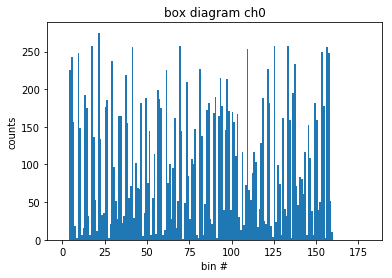

In [6]:
bins = np.arange(0,max_bin+1,1)
data = plt.hist(ft0,bins=bins)
plt.xlabel("bin #")
plt.ylabel("counts")
plt.title("box diagram ch0")
plt.show()
bins = np.arange(0,max_bin,1)

hist = data[0]

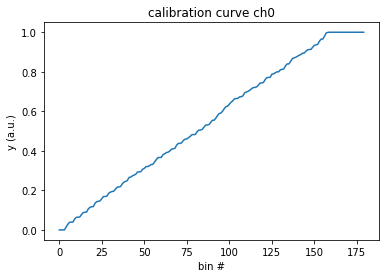

In [7]:
ccurve = np.cumsum(hist)
ccurve = ccurve/np.max(ccurve)

plt.plot(bins,ccurve)
plt.xlabel("bin #")
plt.ylabel("y (a.u.)")
plt.title("calibration curve ch0")
plt.show()

In [8]:
def calc_time(ctime,ftime,ccurve,coarse_tick):
    time = []
    for i in range(len(ctime)):
        time += [ (ctime[i]-ccurve[ftime[i]])*coarse_tick ]
        
    return np.array(time)

In [9]:
time = calc_time(ctime,ft0,ccurve,coarse_tick_s)

In [10]:
tdiff = time[1:-1] - time[0:-2]

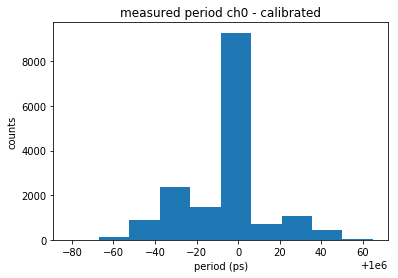

RMS precision: 19.074ps


In [11]:
plt.hist(tdiff*1e12)
plt.title("measured period ch0 - calibrated")
plt.xlabel("period (ps)")
plt.ylabel("counts")
plt.show()

print("RMS precision: {:3.3f}ps".format(  np.std(tdiff*1e12)))

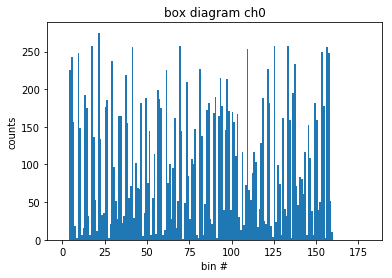

In [6]:
bins = np.arange(0,max_bin+1,1)
data = plt.hist(ft0,bins=bins)


plt.xlabel("bin #")
plt.ylabel("counts")
plt.title("box diagram ch0")
plt.show()
bins = np.arange(0,max_bin,1)

hist = data[0]

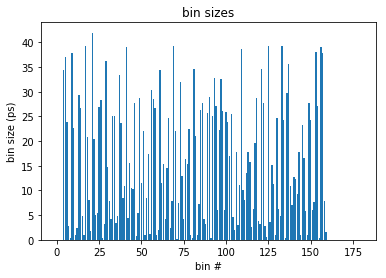

In [18]:
bin_size = hist/np.sum(hist) * 2.5e-9
plt.bar(bins,bin_size*1e12)
plt.xlabel("bin #")
plt.ylabel("bin size (ps)")
plt.title("bin sizes")
plt.show()

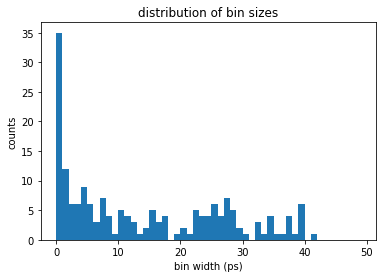

In [21]:
plt.hist(bin_size*1e12,bins=np.arange(0,50,1))
plt.title("distribution of bin sizes")
plt.xlabel("bin width (ps)")
plt.ylabel("counts")
plt.show()

In [23]:
np.mean(bin_size*1e12)

13.88888888888889

In [24]:
np.median(bin_size*1e12)

10.223388671875